In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Install Shapely before importing the part of the package we need.
!pip install shapely
from shapely import wkt

Defaulting to user installation because normal site-packages is not writeable


FIRMS sample fire data contains 74605 rows and 14 columns
(74605, 14)


<Axes: >

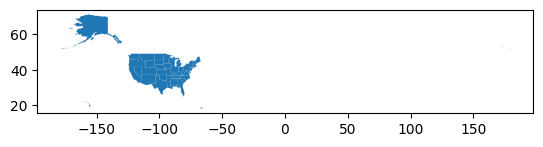

In [2]:
fire_data = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# Show how many rows (records) and columns (values per record) we have of FIRMS VIIRS SNPP data
print ( f'FIRMS sample fire data contains {fire_data.shape[0]} rows and {fire_data.shape[1]} columns' )
print(fire_data.shape)

# Read the shapefile
states_shapefile_url = 'https://firms.modaps.eosdis.nasa.gov/content/notebooks/exampleStatesShapefile2023(20m:coarse).zip'
states_gdf = gpd.read_file(states_shapefile_url)

# Show the data in the Shapefile (States in the USA)
states_gdf.plot()

In [3]:
fire_gdf = gpd.GeoDataFrame(
    fire_data,
    geometry=gpd.points_from_xy(fire_data['longitude'], fire_data['latitude']),
    crs=states_gdf.crs
)

<Axes: >

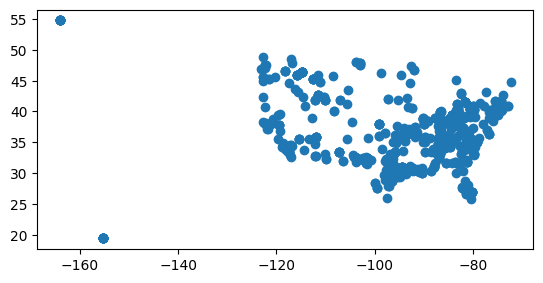

In [4]:
# States Subsetting Example
data_within_shapefile = gpd.sjoin(fire_gdf, states_gdf, how="inner", predicate="intersects")
data_within_shapefile.plot()

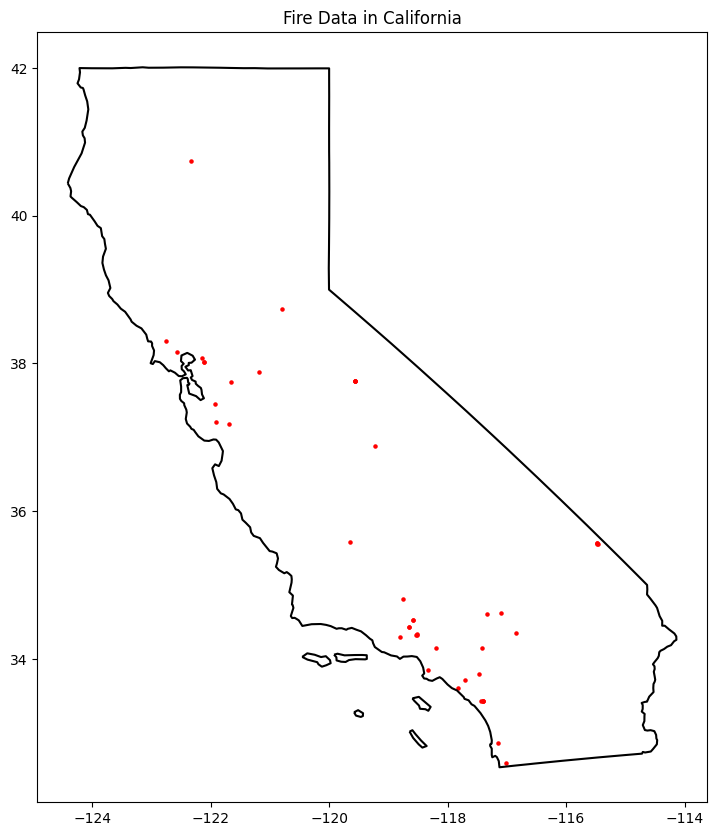

In [5]:
target_state = "California"
subset_state = states_gdf[states_gdf['NAME'] == target_state]

# Spatial join to get fire data within California
fire_within_state = gpd.sjoin(fire_gdf, subset_state, how="inner", predicate="intersects")

# Plotting the subset data
fig, ax = plt.subplots(figsize=(10, 10))
subset_state.boundary.plot(ax=ax, edgecolor='black')
fire_within_state.plot(ax=ax, color='red', markersize=5)
plt.title(f"Fire Data in {target_state}")
plt.show()

In [6]:
fire_within_state.drop(columns='geometry').to_csv('fireCA.csv', index=False)
fire_within_state.to_file('fireCA.shp')
fire_within_state.to_file('fireCA.kml', driver='KML')

C:\Users\angel\AppData\Local\Temp\ipykernel_38112\39051750.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fire_within_state.to_file('fireCA.shp')
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value '2023-07-12' of field fireCA.scan parsed incompletely to real 2023.
  ogr_write(
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 'N' of field fireCA.bright_ti5 parsed incompletely to real 0.
  ogr_write(
C:\Users\angel\AppData\L

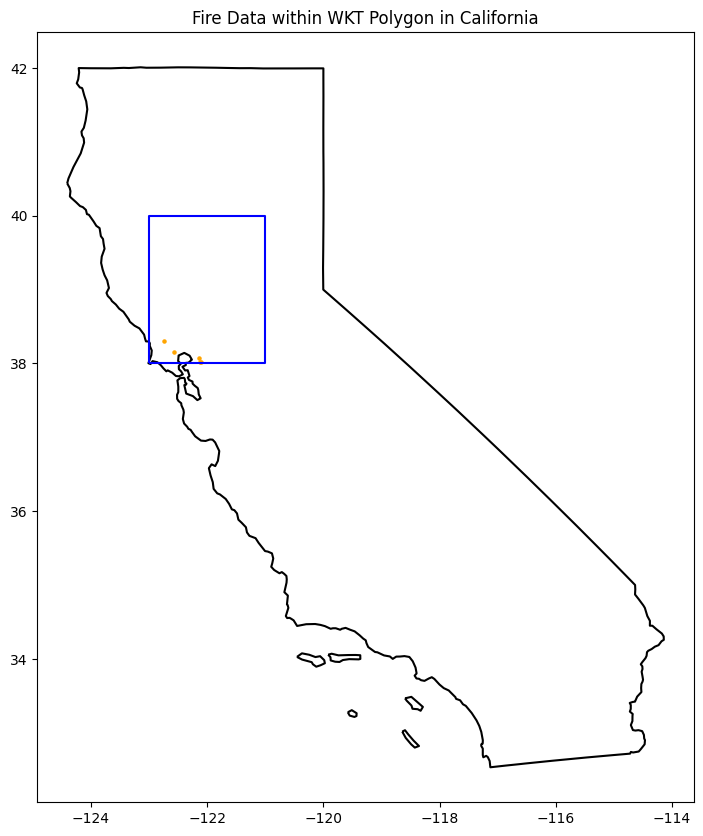

In [7]:
# Polygon Subsetting
polygon_wkt = "POLYGON ((-123.0 38.0, -121.0 38.0, -121.0 40.0, -123.0 40.0, -123.0 38.0))"
  # Example WKT for an active fire region in Northern California
polygon = wkt.loads(polygon_wkt)
polygon_gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon], crs='EPSG:4326')

# Ensure CRS matches for polygon_gdf and fire_gdf
polygon_gdf = polygon_gdf.to_crs(fire_gdf.crs)

# Spatial join to get fire data within the WKT polygon
fire_within_polygon = gpd.sjoin(fire_gdf, polygon_gdf, how="inner", predicate="intersects")

# Plotting the subset data for the WKT polygon inside the state outline of California
fig, ax = plt.subplots(figsize=(10, 10))
subset_state.boundary.plot(ax=ax, edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, edgecolor='blue')
fire_within_polygon.plot(ax=ax, color='orange', markersize=5)
plt.title("Fire Data within WKT Polygon in California")
plt.show()

In [8]:
fire_within_polygon.drop(columns='geometry').to_csv('firePoly.csv', index=False)
fire_within_polygon.to_file('firePoly.shp')
fire_within_polygon.to_file('firePoly.kml', driver='KML')

C:\Users\angel\AppData\Local\Temp\ipykernel_38112\1332360258.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fire_within_polygon.to_file('firePoly.shp')
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value '2023-07-12' of field firePoly.scan parsed incompletely to real 2023.
  ogr_write(
C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 'N' of field firePoly.bright_ti5 parsed incompletely to real 0.
  ogr_write(
